In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression

In [3]:
def load_data_set(filename):
    data_mat = []
    label_mat = []
    num_feat = len(open(filename).readline().split('\t')) - 1
    
    with open(filename) as file:
        for line in file:
            line_arr = []
            cur_line = line.strip().split('\t')
            
            for i in range(num_feat):
                line_arr.append(float(cur_line[i]))
            data_mat.append(line_arr)
            label_mat.append(float(cur_line[-1]))
    return data_mat, label_mat

In [4]:
def stand_regres(x_arr, y_arr):
    x_mat = np.mat(x_arr)
    y_mat = np.mat(y_arr).T
    x_T_x = x_mat.T * x_mat
    if np.linalg.det(x_T_x) == 0.0:
        print("This matrix is singular, cannot do incerse")
        return 
    ws = x_T_x.I * (x_mat.T * y_mat)
    return ws

In [5]:
x_arr, y_arr = load_data_set("ex0.txt")

In [8]:
ws = stand_regres(x_arr, y_arr)

In [9]:
ws

matrix([[ 3.00774324],
        [ 1.69532264]])

In [10]:
x_mat, y_mat = np.mat(x_arr), np.mat(y_arr)
y_hat = x_mat * ws

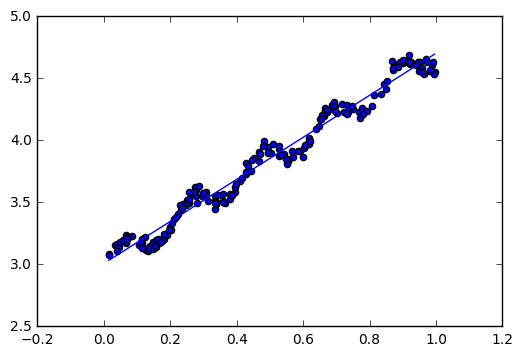

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_mat[:, 1].flatten().A[0],
           y_mat.T[:, 0].flatten().A[0])

x_copy = x_mat.copy()
x_copy.sort(0)
y_hat = x_copy * ws
ax.plot(x_copy[:, 1], y_hat)
plt.show()

In [23]:
y_hat = x_mat * ws
np.corrcoef(y_hat.T, y_mat)

array([[ 1.        ,  0.98647356],
       [ 0.98647356,  1.        ]])

# Locally Weighted Linear Regression

$$ \hat{w} = (X^{T}WX)^{-1}X^{T}Wy $$

In [37]:
def lwlr(test_points, x_arr, y_arr, k=1.0):
    x_mat = np.mat(x_arr)
    y_mat = np.mat(y_arr).T
    m = x_mat.shape[0]
    weights = np.mat(np.eye(m))
    
    for j in range(m):
        diff_mat = test_points - x_mat[j, :]
        weights[j, j] = np.exp(diff_mat * diff_mat.T / (-2.0 * k ** 2))
    xTx = x_mat.T * (weights * x_mat)
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (x_mat.T * (weights * y_mat))
    return test_points * ws

In [43]:
def lwlr_test(test_arr, x_arr, y_arr, k=1.0):
    m = np.shape(test_arr)[0]
    y_hat = np.zeros(m)
    for i in range(m):
        y_hat[i] = lwlr(test_arr[i], x_arr, y_arr, k)
    return y_hat

In [44]:
x_arr, y_arr = load_data_set("ex0.txt")

In [45]:
lwlr(x_arr[0], x_arr, y_arr, 1.0)

matrix([[ 3.12204471]])

In [46]:
lwlr(x_arr[0], x_arr, y_arr, 0.001)

matrix([[ 3.20175729]])

In [47]:
y_hat = lwlr_test(x_arr, x_arr, y_arr, 0.003)

In [50]:
x_mat = np.mat(x_arr)
srt_ind = x_mat[:, 1].argsort(0)
x_sort = x_mat[srt_ind][:, 0, :]

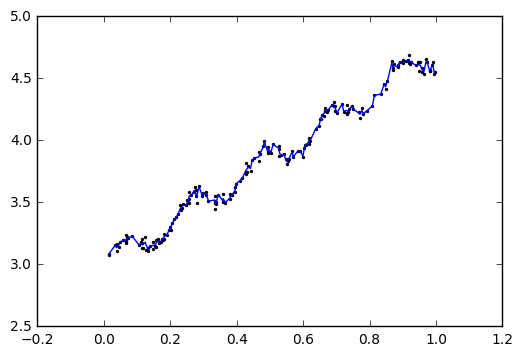

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_sort[:, 1], y_hat[srt_ind])

ax.scatter(x_mat[:, 1].flatten().A[0],
           np.mat(y_arr).T.flatten().A[0],
           s=2, c="red")
plt.show()